# 1. Метод k ближайших соседей

Сгенерируйте обучающую выборку из описанных двумя признаками объектов нескольких классов и визуализируйте разделяющие поверхности, получаемые при решении задачи классифкации методом k ближайших соседей для разных k. Попробуйте подобрать оптимальное значение количества соседей k с помощью 5-fold cross-validation, построив график зависимости accuracy в кросс-валидации от k.

In [1]:
from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
import numpy as np
import matplotlib.pyplot as pyplot
from matplotlib.colors import ListedColormap
%matplotlib inline
pyplot.style.use('seaborn-notebook')

In [2]:
X, y = datasets.make_classification(n_samples=500, n_features =2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=23)
train_data, test_data, train_labels, test_labels = train_test_split(X, 
                                                                    y, 
                                                                    test_size = 0.3,
                                                                    random_state = 1)

In [3]:
acc_score = []
n = 25
k_space = np.linspace(1, n, n, dtype=int)
for k in k_space:
    classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
    acc_score += [cross_val_score(classifier, X, y, scoring="accuracy", cv=StratifiedKFold(n_splits=5)).mean(0)]
acc_score = np.array(acc_score)

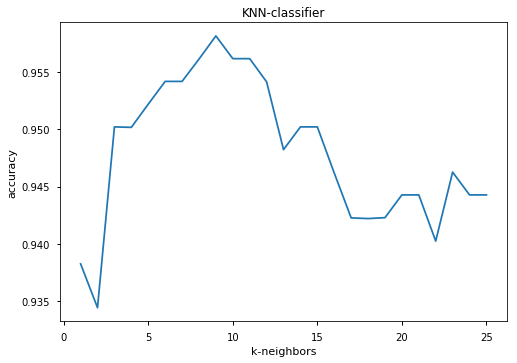

Наилучшее число соседей: 9


In [4]:
pyplot.plot(k_space, acc_score)
pyplot.xlabel("k-neighbors")
pyplot.ylabel("accuracy")
pyplot.title("KNN-classifier")
pyplot.show()
k_best = k_space[acc_score.argmax(0)]
print "Наилучшее число соседей: %s" % k_best

In [5]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
def get_meshgrid(data, step=.05, border=.8,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, 
                                                                             estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, 
                                                                            estimator.predict(test_data))))

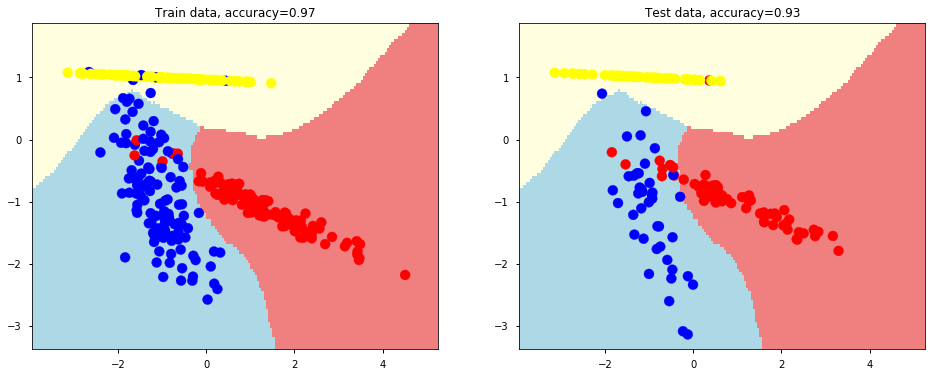

In [6]:
classifier = neighbors.KNeighborsClassifier(n_neighbors=k_best)
plot_decision_surface(classifier, train_data, train_labels, test_data, test_labels)